# 美国大选

找了两个数据集，来自[danielteberian/2024-Election-Data: A collection of data, provided by official sources, from the 2024 elections in the United States. This repository will be updated as new data is released.](https://github.com/danielteberian/2024-Election-Data)

[特朗普获胜！2024美国大选结果出炉｜美国大选实时数据与信息一览 - BlockBeats](https://www.theblockbeats.info/news/55628)



### 哈里斯与特朗普在各州的得票率比较

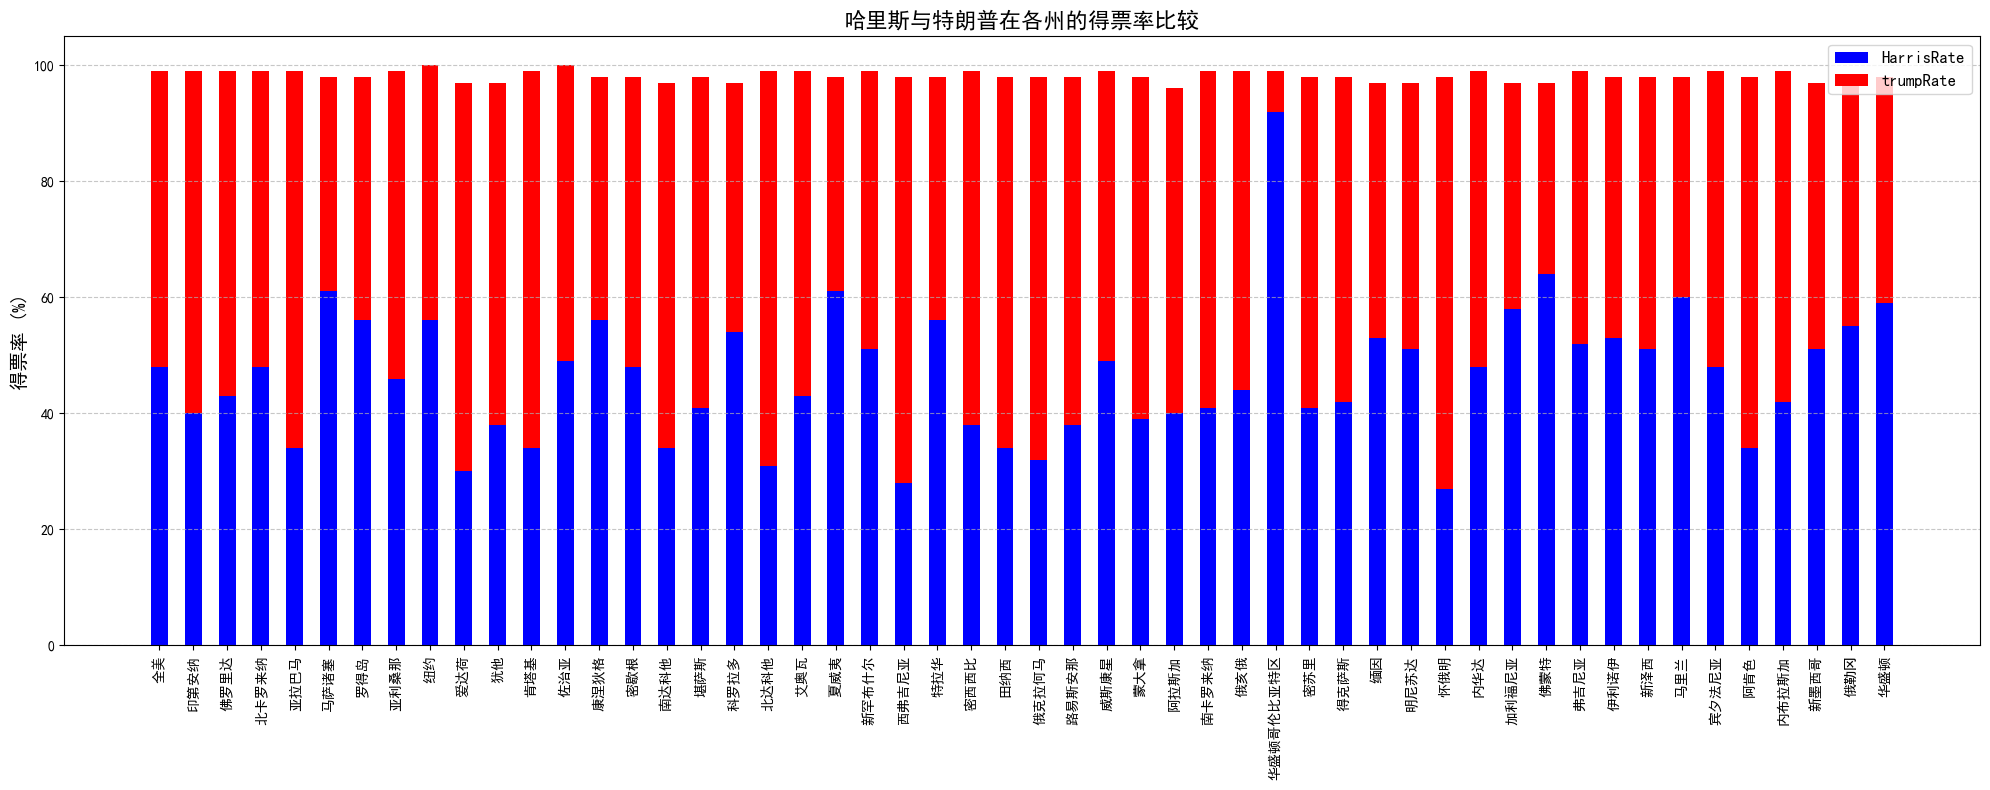

In [8]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False
file_path = '../data/election.xlsx'  # 读取Excel文件
data = pd.read_excel(file_path)  # 使用 latin1 编码读取文件

plt.figure(figsize=(20, 8))
bar_width = 0.5
x_positions = range(len(data['name']))

plt.bar(x_positions, data['HarrisRate'], color='blue', width=bar_width, label='HarrisRate')
plt.bar(x_positions, data['trumpRate'], bottom=data['HarrisRate'], color='red', width=bar_width, label='trumpRate')

plt.xticks(x_positions, data['name'], rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('得票率 (%)', fontsize=14)
plt.title('哈里斯与特朗普在各州的得票率比较', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 选举地图可视化 使用geopandas

           featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   

                                   wikipedia iso_a2  adm0_sr          name  \
0     http://en.wikipedia.org/wiki/Minnesota     US        1     Minnesota   
1       http://en.wikipedia.org/wiki/Montana     US        1       Montana   
2  http://en.wikipedia.org/wiki/North_Dakota     US        1  North Dakota   
3        http://en.wikipedia.org/wiki/Hawaii     US        8        Hawaii   
4         http://en.wikipedia.org/wiki/Idaho     US        1         Idaho   

    name_alt  ... FCLASS_ID FCLASS_PL FCLASS_GR FCLASS_IT FCLASS_NL FCLASS_SE  \
0   MN|Minn.  ...      None      None      None      

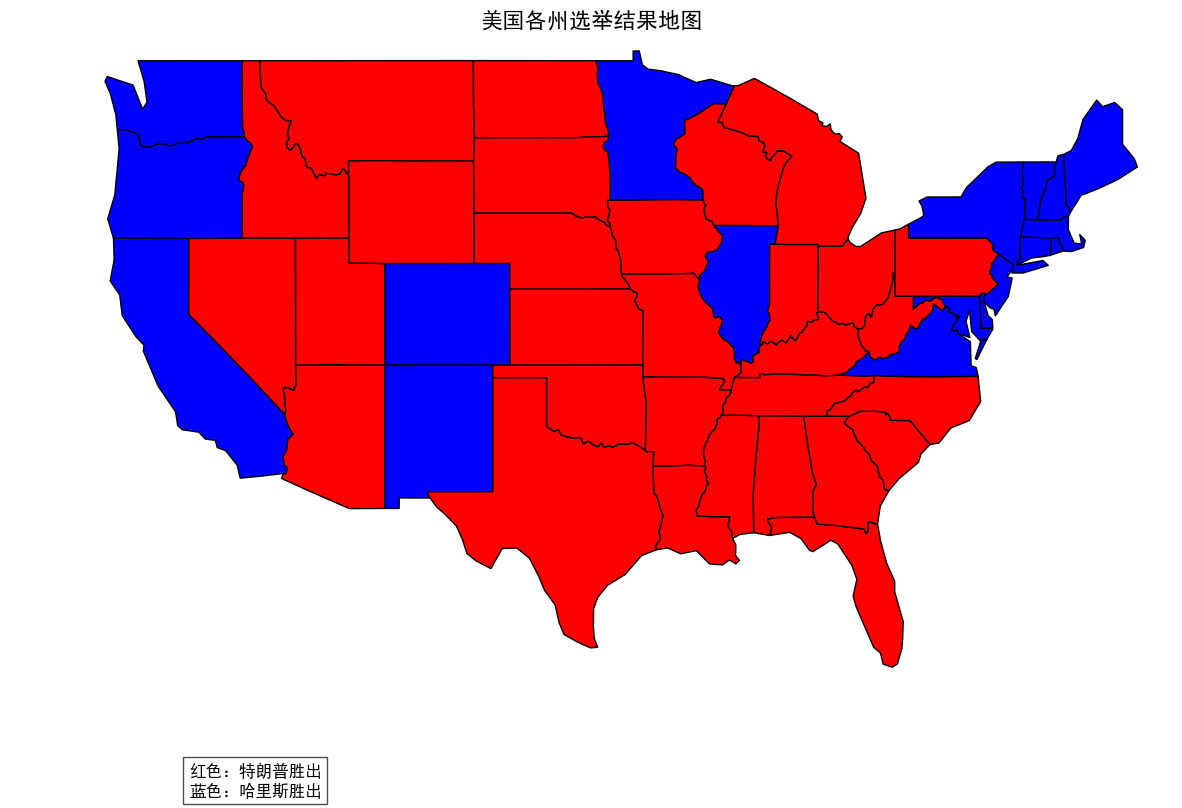

In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from geodatasets import get_path

election_data = pd.read_excel('../data/election.xlsx')
election_data['winner'] = election_data.apply(
    lambda row: 'Harris' if row['HarrisRate'] > row['trumpRate'] else 'Trump',
    axis=1
)

# 读取州地图数据,这里需要注意的是，我手动下载了ne_110m_admin_1_states_provinces.shp文件，并放在了data文件夹下
us_states = gpd.read_file('../data/state/ne_110m_admin_1_states_provinces.shp')

# 将地理数据和选举数据进行合并
merged = us_states.merge(election_data, left_on="name", right_on="name", how="outer")



print(merged.head())
# 颜色映射：根据胜者着色
merged['color'] = merged['winner'].map({'Harris': 'blue', 'Trump': 'red'}).fillna('gray')

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(ax=ax, color=merged['color'], edgecolor="black")
ax.set_xlim([-130, -65])
ax.set_ylim([23, 50])
# 添加图例和标题
plt.title("美国各州选举结果地图", fontsize=16)
plt.text(-120, 20, "红色：特朗普胜出\n蓝色：哈里斯胜出", fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.axis("off")  # 隐藏坐标轴
plt.show()


### 其他数据

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('../data/election.csv')

# 1. Presidential Race Analysis
presidential_df = df[df['office'] == 'President and Vice President']
fig1 = px.bar(presidential_df, 
              x='candidatename', 
              y='totalvotessum',
              title='2024 Presidential Election Results - Delaware',
              color='partyname',
              text=presidential_df['totalvotespercentage'].round(2).astype(str) + '%',
              labels={'candidatename': 'Candidate',
                     'totalvotessum': 'Total Votes',
                     'partyname': 'Party'})
fig1.show()

# 2. Voting Methods Distribution
voting_methods = pd.DataFrame({
    'Method': ['Machine Votes', 'Absentee Votes', 'Early Votes'],
    'Count': [presidential_df['machinevotessum'].sum(),
              presidential_df['absenteevotessum'].sum(),
              presidential_df['earlyvotessum'].sum()]
})

fig2 = px.pie(voting_methods, 
              values='Count', 
              names='Method',
              title='Distribution of Voting Methods - Presidential Election')
fig2.show()

# 3. Party-wise Vote Distribution
party_votes = df.groupby('partyname')['totalvotessum'].sum().reset_index()
fig3 = px.bar(party_votes,
              x='partyname',
              y='totalvotessum',
              title='Total Votes by Party - All Races',
              color='partyname',
              labels={'partyname': 'Party',
                     'totalvotessum': 'Total Votes'})
fig3.show()

# 4. Top Races Comparison
top_races = df[df['office'].isin(['President and Vice President', 
                                 'U.S. Senator', 
                                 'Governor'])]
fig4 = go.Figure()

for method in ['machinevotessum', 'absenteevotessum', 'earlyvotessum']:
    fig4.add_trace(go.Bar(name=method.replace('votessum', ''),
                         x=top_races['office'] + ' - ' + top_races['candidatename'],
                         y=top_races[method]))

fig4.update_layout(barmode='stack',
                  title='Voting Method Distribution Across Major Races',
                  xaxis_title='Race and Candidate',
                  yaxis_title='Number of Votes')
fig4.show()

fig5 = px.bar(presidential_df,
              x='candidatename',
              y='totalvotessum',
              color='partyname',
              animation_frame='xmlreporttime',
              title='Vote Counting Progress - Presidential Race',
              labels={'candidatename': 'Candidate',
                     'totalvotessum': 'Total Votes',
                     'partyname': 'Party'})
fig5.show()